# Overview : This is a kaggle competition hosted by the Santender Bank. The goal is to predict a target (value of transaction) with the given dataset.

In [143]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [144]:
# Loading train and test dataset

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [145]:
# Initial analysis of data

train_df.shape

(4459, 4993)

In [146]:
test_df.shape

(49343, 4992)

In [147]:
# column name verification

train_columns = list(train_df.columns.values)
test_columns = list(test_df.columns.values)
set(train_columns) - set(test_columns)

{'target'}

In [148]:
train_df.head(5)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [149]:
# Datatype verification

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


# With the initial look at the dataset we can understand that the dataset is anonymized, containing majority numeric feature variables, the numeric target column, and only one string ID column.

# The test data is almost ten times that of the train data and also the number of features is greater than the number of instances in the train dataset.

In [150]:
#checking for missing values

missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


# Looks like a clean dataset, with no missing values found

In [151]:
# Checking for constant value column

unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape

(256, 2)

# we have 256 columns with constant values. 

# Below is the target variable distribution 

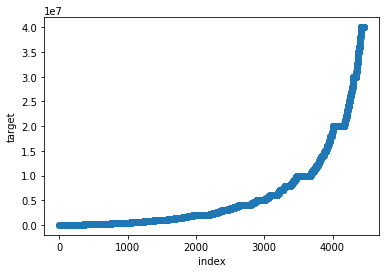

In [153]:
#Target Plot

plt.figure(figsize= (6,4))
plt.scatter (range(train_df.shape[0]), np.sort(train_df['target'].values))
plt.xlabel('index')
plt.ylabel('target')
plt.show()

In [155]:
# Target Statistics

train_df['target'].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

C:\Users\prath\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Target Histogram')

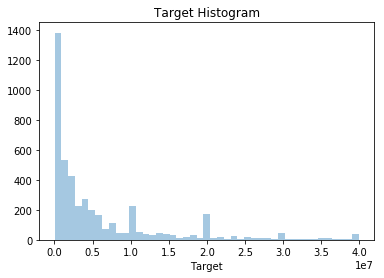

In [197]:
# plotting the target variable

plt.figure(figsize=(6,4))
sns.distplot(train_df["target"].values, kde = False)
plt.xlabel('Target')
plt.title('Target Histogram')

# The Target Histogram is skewed in the left direction and thus we will do a Histogram plot on the log of the target value

C:\Users\prath\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Log of Target Histogram')

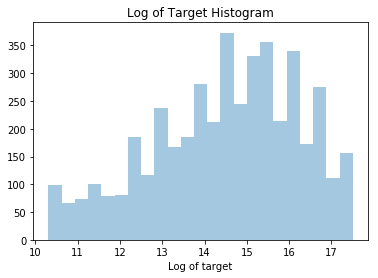

In [157]:
# Log of Target Histogram

sns.distplot(np.log1p(train_df['target']), kde = False)
plt.xlabel('Log of target')
plt.title ('Log of Target Histogram')

In [158]:
# Dropping the constant columns from the training dataset

train_X = train_df.drop(constant_df.col_name.tolist() + ["ID", "target"], axis = 1)
train_y = np.log1p(train_df["target"].values)
test_X = test_df.drop(constant_df.col_name.tolist() +["ID"], axis=1)

In [159]:
print (train_X.shape)
print (train_y.shape)
print (test_X.shape)

(4459, 4735)
(4459,)
(49343, 4735)


# Drop Sparse data

In [160]:
# Finding cloumns with 95% or more of 0's and dropping the columns having 98% or more of 0's fron the data.

zero_count = []
for col in train_X.columns[2:]:
    zero_count.append([i[1] for i in list(train_X[col].value_counts().items()) if i[0] == 0][0])
    
print('{0} features of 4491 have zeroes in 99% or more samples.'.format(len([i for i in zero_count if i >= 4459 * 0.99])))
print('{0} features of 4491 have zeroes in 98% or more samples.'.format(len([i for i in zero_count if i >= 4459 * 0.98])))
print('{0} features of 4491 have zeroes in 97% or more samples.'.format(len([i for i in zero_count if i >= 4459 * 0.97])))
print('{0} features of 4491 have zeroes in 96% or more samples.'.format(len([i for i in zero_count if i >= 4459 * 0.96])))
print('{0} features of 4491 have zeroes in 95% or more samples.'.format(len([i for i in zero_count if i >= 4459 * 0.95])))

cols_to_drop = [col for col in train_X.columns[2:] if [i[1] for i in list(train_X[col].value_counts().items()) 
                                                       if i[0] == 0][0] >= 4459 * 0.98]

train_X.drop(cols_to_drop, axis=1, inplace=True)
test_X.drop(cols_to_drop, axis=1, inplace=True)

print('\nTrain shape: {}\nTest shape: {}'.format(train_X.shape, test_X.shape))

2106 features of 4491 have zeroes in 99% or more samples.
2612 features of 4491 have zeroes in 98% or more samples.
3059 features of 4491 have zeroes in 97% or more samples.
3538 features of 4491 have zeroes in 96% or more samples.
3736 features of 4491 have zeroes in 95% or more samples.

Train shape: (4459, 2123)
Test shape: (49343, 2123)


# Getting the data ready for the modeling purpose. Splitting the train dataset into train and validation set

In [161]:
# Split train data in train and validation set for modelling purpose

from sklearn.model_selection import train_test_split

dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size = 0.2, random_state= 42)

In [162]:
dev_X.shape

(3567, 2123)

# Baseline Model (RandomForestRegressor) with all the data

In [163]:
# Modelling and fitting the data. - Baseline model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state= 42, n_jobs= -1)
model.fit(dev_X, dev_y)
RF_predict = model.predict(val_X)


# A function to calculate RMSLE

In [164]:
import math
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))

In [165]:
print (rmsle(RF_predict, val_y))

0.100620510206


# Plotting the predict and the true value

In [193]:
print(pd.concat([pd.DataFrame(RF_predict), pd.DataFrame(val_y)], axis = 1) . head(5))

           0          0
0  15.108153  16.118096
1  15.470962  15.894952
2  15.229092  15.312153
3  14.230012  12.206078
4  14.407363  14.786290


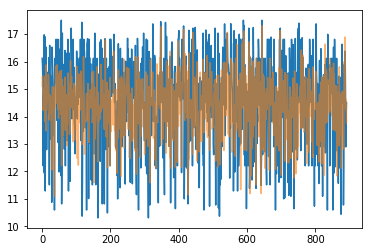

In [206]:
# Plotting predicted value vs the val_y

plt.plot(val_y)
plt.plot(RF_predict, alpha = 0.6)


#  Preparing and Predicting the target variable for the test dataset

In [166]:
# Checking test dataset for NA's and infinite values before predicting the target variable 

In [167]:
np.any(np.isnan(test_X))

True

In [168]:
np.all(np.isfinite(test_X))

False

In [169]:
test_X.isnull().sum().sum()

939

In [170]:
# Cleaning the test dataet of nan and inf values

import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

test_X = clean_dataset(test_X)

In [171]:
# Predicting the target values for test data

RF_predict_sub = model.predict(test_X)
RF_predict_sub = np.expm1(RF_predict_sub)

In [172]:
len(RF_predict_sub)

49342

In [173]:
test_df = test_df.dropna()


In [174]:
len(test_df)

49342

# Output file with the predicted values

In [175]:
# Output file - submission file

#sub = pd.read_csv()

output = pd.DataFrame()
output['ID'] = test_df['ID']
output['target'] = RF_predict_sub
output.to_csv("ouput.csv",index=False)

In [176]:
output.head(5)

,ID,target
0,000137c73,9.786699e+05
1,00021489f,1.513615e+06
2,0004d7953,2.653968e+06
3,00056a333,3.379264e+06
4,00056d8eb,1.386201e+06


# Trying for LGBM

In [178]:
#LGBM

import lightgbm as lgb


def run_lgb(dev_X, dev_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(dev_X, label=dev_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [179]:
# Kfold validation and average the prediction

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2017)
pred_test_full = 0
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index,:], train_X.loc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_test_full += pred_test
pred_test_full /= 5.
pred_test_full = np.expm1(pred_test_full)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.44489
[400]	valid_0's rmse: 1.42508
Early stopping, best iteration is:
[434]	valid_0's rmse: 1.42502
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.44102
[400]	valid_0's rmse: 1.40337
[600]	valid_0's rmse: 1.39793
[800]	valid_0's rmse: 1.39719
Early stopping, best iteration is:
[770]	valid_0's rmse: 1.39666
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.44749
[400]	valid_0's rmse: 1.42026
[600]	valid_0's rmse: 1.4204
Early stopping, best iteration is:
[511]	valid_0's rmse: 1.4197
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.48974
[400]	valid_0's rmse: 1.45262
[600]	valid_0's rmse: 1.44814
[800]	valid_0's rmse: 1.44532
Early stopping, best iteration is:
[840]	valid_0's rmse: 1.44474
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.47996
[400]	v

# Output file from LGB Model

In [191]:
# Making a submission file #
sub_df = pd.DataFrame({"ID":test_df["ID"].values})
sub_df["target"] = pred_test_full
sub_df.to_csv("baseline_lgb.csv", index=False)

In [192]:
sub_df.head(5)

,ID,target
0,000137c73,1.703111e+06
1,00021489f,1.816460e+06
2,0004d7953,2.001114e+06
3,00056a333,4.777854e+06
4,00056d8eb,1.931162e+06


In [35]:
# PCA 
   # Finding the right number of components

#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

#standardized_train = StandardScaler().fit_transform(train_X.values)
    
#def _get_number_components(model, threshold):
    #component_variance = model.explained_variance_ratio_
    #explained_variance = 0.0
    #components = 0

    #for var in component_variance:
        #explained_variance += var
        #components += 1
        #if(explained_variance >= threshold):
            #break
    #return components

### Get the optimal number of components
#pca = PCA()
#train_pca = pca.fit_transform(standardized_train)
#components = _get_number_components(pca, threshold=0.85)
#components    


599

# Decomposition preocess - finding the features with statistical importance. This can be done by implementing PCA, ICA , GRP, SRP and appending the decomposed features with the train dataset for further modeling.

In [185]:
#Decomposition process  - Decomposing the dataset to be able to add other features to the dataset.

PERC_TRESHOLD = 0.98   ### Percentage of zeros in each feature ###
N_COMP = 20    ### Number of decomposition components ###

In [186]:
# Applying decomposition techniques like PCA, ICA , GRP and SRP 

from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection

print("\nStart decomposition process...")
print("PCA")
pca = PCA(n_components=N_COMP, random_state=17)
pca_results_train = pca.fit_transform(train_X)
pca_results_test = pca.transform(test_X)

print("ICA")
ica = FastICA(n_components=N_COMP, random_state=17)
ica_results_train = ica.fit_transform(train_X)
ica_results_test = ica.transform(test_X)

print("GRP")
grp = random_projection.GaussianRandomProjection(n_components=N_COMP, eps=0.1, random_state=17)
grp_results_train = grp.fit_transform(train_X)
grp_results_test = grp.transform(test_X)

print("SRP")
srp = random_projection.SparseRandomProjection(n_components=N_COMP, dense_output=True, random_state=17)
srp_results_train = srp.fit_transform(train_X)
srp_results_test = srp.transform(test_X)



Start decomposition process...
PCA
ICA
GRP
SRP


In [187]:
# Appending the decomposition components to the dataset

print("Append decomposition components to datasets...")
for i in range(1, N_COMP + 1):
    train_X['pca_' + str(i)] = pca_results_train[:, i - 1]
    test_X['pca_' + str(i)] = pca_results_test[:, i - 1]

    train_X['ica_' + str(i)] = ica_results_train[:, i - 1]
    test_X['ica_' + str(i)] = ica_results_test[:, i - 1]

    train_X['grp_' + str(i)] = grp_results_train[:, i - 1]
    test_X['grp_' + str(i)] = grp_results_test[:, i - 1]

    train_X['srp_' + str(i)] = srp_results_train[:, i - 1]
    test_X['srp_' + str(i)] = srp_results_test[:, i - 1]
print('\nTrain shape: {}\nTest shape: {}'.format(train_X.shape, test_X.shape))

Append decomposition components to datasets...

Train shape: (4459, 2203)
Test shape: (49342, 2203)


# Splitting the decomposed dataset and implementing Random Forest regressor on the appended dataset.

In [188]:
# Splitting the dataset for modelling

from sklearn.model_selection import train_test_split

dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size = 0.2, random_state= 42)

In [131]:
# Modelling the appended dataset with Random forest 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state= 42, n_jobs= -1)
model.fit(dev_X, dev_y)
RF_predict_decom = model.predict(val_X)

In [132]:
# Calculate the RMSLE value

print(rmsle(RF_predict_decom, val_y))

0.099984663441


# Plotting the predicted target value vs the true value in the training set

In [195]:
print(pd.concat([pd.DataFrame(RF_predict_decom), pd.DataFrame(val_y)], axis=1).head(5))

           0          0
0  13.446619  16.118096
1  14.040440  15.894952
2  14.546408  15.312153
3  13.294865  12.206078
4  15.098778  14.786290


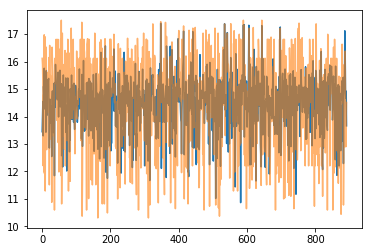

In [205]:
# PLotting predict value vs the val_y

plt.plot(RF_predict_decom)
plt.plot(val_y, alpha = 0.6)


In [133]:
# Predicting the target variable in the test data

RF_predict_decom_test = model.predict(test_X)
RF_predict_decom_test = np.expm1(RF_predict_decom_test)

In [134]:
# Output file - Submission file

#sub = pd.read_csv()

output_decom = pd.DataFrame()
output_decom['ID'] = test_df['ID']
output_decom['target'] = RF_predict_decom_test
output_decom.to_csv("ouput_decom.csv",index=False)

In [135]:
output_decom.head(5)

,ID,target
0,000137c73,5.659205e+06
1,00021489f,1.415726e+06
2,0004d7953,1.551141e+06
3,00056a333,7.884227e+06
4,00056d8eb,6.560515e+05
